In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.model import Sequential
from keras.layers import Dense,Dropout,Activation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
%matplotlib inline

ModuleNotFoundError: No module named 'keras'

In [219]:
data1 = pd.read_csv('data.csv')
data2 = pd.read_csv('sample_submission.csv')

In [220]:
data1.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [221]:
data1.action_type

0                 Jump Shot
1                 Jump Shot
2                 Jump Shot
3                 Jump Shot
4         Driving Dunk Shot
5                 Jump Shot
6                Layup Shot
7                 Jump Shot
8                 Jump Shot
9         Running Jump Shot
10                Jump Shot
11                Jump Shot
12        Running Jump Shot
13                Jump Shot
14                Jump Shot
15                Jump Shot
16       Driving Layup Shot
17                Jump Shot
18                Jump Shot
19       Driving Layup Shot
20                Jump Shot
21                Jump Shot
22        Running Jump Shot
23        Running Jump Shot
24        Running Jump Shot
25               Layup Shot
26                Jump Shot
27                Jump Shot
28                Jump Shot
29                Jump Shot
                ...        
30667             Jump Shot
30668             Jump Shot
30669             Jump Shot
30670     Running Jump Shot
30671    Driving Lay

In [222]:
data1['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


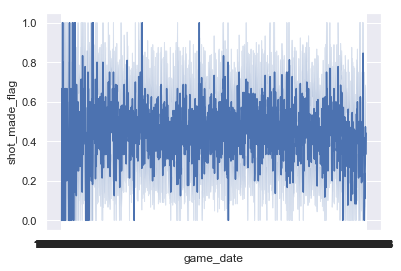

In [223]:
sns.set()
ax = sns.lineplot(x="game_date", y="shot_made_flag", data=data1)

In [224]:
data1.keys()

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [225]:
features=data1.drop(['team_name','game_date','shot_made_flag','lat','lon','team_id','game_event_id','game_id'],axis=1)

In [226]:
features

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,-145,-11,9,3,0,2000-01,32,14,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,POR,6
6,Layup Shot,Layup,0,0,8,3,0,2000-01,52,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,1,28,8,3,0,2000-01,5,2,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,-65,108,6,3,0,2000-01,12,12,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,-33,125,3,3,0,2000-01,36,12,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,LAL @ POR,POR,10


In [227]:
target=data1['shot_made_flag']
target.head()

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
Name: shot_made_flag, dtype: float64

In [228]:
target_clean=data1
target_clean.fillna(target.mean(),inplace=True)
target_clean.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [229]:
target.head()

0    0.446161
1    0.000000
2    1.000000
3    0.000000
4    1.000000
Name: shot_made_flag, dtype: float64

In [230]:
actions = []
for i in features['action_type']:
    i = i.replace(" ", "_")
    actions.append(i)

In [231]:
act_df = pd.Series(np.array(actions))
y = pd.get_dummies(act_df)
y.head()

,Alley_Oop_Dunk_Shot,Alley_Oop_Layup_shot,Cutting_Finger_Roll_Layup_Shot,Cutting_Layup_Shot,Driving_Bank_shot,Driving_Dunk_Shot,Driving_Finger_Roll_Layup_Shot,Driving_Finger_Roll_Shot,Driving_Floating_Bank_Jump_Shot,Driving_Floating_Jump_Shot,...,Slam_Dunk_Shot,Step_Back_Jump_shot,Tip_Layup_Shot,Tip_Shot,Turnaround_Bank_shot,Turnaround_Fadeaway_Bank_Jump_Shot,Turnaround_Fadeaway_shot,Turnaround_Finger_Roll_Shot,Turnaround_Hook_Shot,Turnaround_Jump_Shot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
pca = PCA(n_components=13)
ypca = pca.fit_transform(y.values)
ypca.shape


(30697, 13)

In [233]:
cst = []
for i in features['combined_shot_type']:
    i = i.replace(" ", "_")
    cst.append(i)

In [234]:
cst_df = pd.Series(np.array(cst))
y = pd.get_dummies(cst_df)
y.head()

,Bank_Shot,Dunk,Hook_Shot,Jump_Shot,Layup,Tip_Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [235]:
pca = PCA(n_components=2)
ypca = pca.fit_transform(y.values)
ypca.shape


(30697, 2)

In [236]:
shots = []
for i in features['shot_type']:
    i = i.replace(" ", "_")
    shots.append(i)

In [237]:
shot_df = pd.Series(np.array(shots))
y = pd.get_dummies(shot_df)
y.head()

,2PT_Field_Goal,3PT_Field_Goal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [238]:
pca = PCA(n_components=1)
ypca = pca.fit_transform(y.values)
ypca.shape


(30697, 1)

In [239]:
sza = []
for i in features['shot_zone_area']:
    i=i.replace(" ","_")
    i=i.replace("(","_")
    i=i.replace(")","_")
    sza.append(i)


In [240]:
sza_df=pd.Series(np.array(sza))
y=pd.get_dummies(sza_df)
y.head()

,Back_Court_BC_,Center_C_,Left_Side_Center_LC_,Left_Side_L_,Right_Side_Center_RC_,Right_Side_R_
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [241]:
pca = PCA(n_components=3)
ypca = pca.fit_transform(y.values)
ypca.shape

(30697, 3)

In [242]:
szb = []
for i in features['shot_zone_basic']:
    i=i.replace("-","_")
    i=i.replace(" ","_")
    szb.append(i)

In [243]:
szb_df=pd.Series(np.array(szb))
y=pd.get_dummies(szb_df)
y.head()

,Above_the_Break_3,Backcourt,In_The_Paint_(Non_RA),Left_Corner_3,Mid_Range,Restricted_Area,Right_Corner_3
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [244]:
pca=PCA(n_components=4)
ypca = pca.fit_transform(y.values)
ypca.shape


(30697, 4)

In [245]:
szr = []
for i in features['shot_zone_range']:
    i=i.replace(" ","_")
    i=i.replace("-","_")
    szr.append(i)

In [246]:
szr_df=pd.Series(np.array(szr))
y=pd.get_dummies(szr_df)
y.head()

,16_24_ft.,24+_ft.,8_16_ft.,Back_Court_Shot,Less_Than_8_ft.
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [247]:
pca=PCA(n_components=2)
ypca = pca.fit_transform(y.values)
ypca.shape

(30697, 2)

In [248]:
target_new=pd.DataFrame(data=target)
features=pd.DataFrame(features,columns=['action_type', 'combined_shot_type','loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs',
'season', 'seconds_remaining', 'shot_distance','shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
'matchup', 'opponent', 'shot_id'])
target_new.head()

,shot_made_flag
0,0.446161
1,0.000000
2,1.000000
3,0.000000
4,1.000000


In [249]:
ds=pd.concat([features,target_new],axis=1)

In [250]:
ds

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,opponent,shot_id,shot_made_flag
0,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,LAL @ POR,POR,1,0.446161
1,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,POR,2,0.000000
2,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL @ POR,POR,3,1.000000
3,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,LAL @ POR,POR,4,0.000000
4,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,5,1.000000
5,Jump Shot,Jump Shot,-145,-11,9,3,0,2000-01,32,14,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,LAL @ POR,POR,6,0.000000
6,Layup Shot,Layup,0,0,8,3,0,2000-01,52,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,7,1.000000
7,Jump Shot,Jump Shot,1,28,8,3,0,2000-01,5,2,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL @ POR,POR,8,0.446161
8,Jump Shot,Jump Shot,-65,108,6,3,0,2000-01,12,12,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,LAL @ POR,POR,9,1.000000
9,Running Jump Shot,Jump Shot,-33,125,3,3,0,2000-01,36,12,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,LAL @ POR,POR,10,0.000000


In [251]:
correlation=ds.corr('pearson')
correlation

,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,shot_made_flag
loc_x,1.000000,-0.016217,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.019917,-0.000775
loc_y,-0.016217,1.000000,-0.071462,0.041248,0.001143,-0.052714,0.818517,0.030790,-0.136032
minutes_remaining,0.006898,-0.071462,1.000000,-0.043425,0.015101,0.025558,-0.059767,-0.005731,0.025950
period,-0.028165,0.041248,-0.043425,1.000000,0.008789,0.005832,0.046993,0.000364,-0.029365
playoffs,-0.012790,0.001143,0.015101,0.008789,1.000000,-0.002490,-0.008667,0.612571,-0.001149
seconds_remaining,0.001083,-0.052714,0.025558,0.005832,-0.002490,1.000000,-0.051482,-0.004868,0.028255
shot_distance,0.022654,0.818517,-0.059767,0.046993,-0.008667,-0.051482,1.000000,0.015695,-0.181660
shot_id,-0.019917,0.030790,-0.005731,0.000364,0.612571,-0.004868,0.015695,1.000000,-0.011907
shot_made_flag,-0.000775,-0.136032,0.025950,-0.029365,-0.001149,0.028255,-0.181660,-0.011907,1.000000


In [252]:
abs(correlation['shot_made_flag'])

loc_x                0.000775
loc_y                0.136032
minutes_remaining    0.025950
period               0.029365
playoffs             0.001149
seconds_remaining    0.028255
shot_distance        0.181660
shot_id              0.011907
shot_made_flag       1.000000
Name: shot_made_flag, dtype: float64

In [19]:
data1_clean=data1
data1_clean.fillna(data1.mean(),inplace=True)
data1_clean.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


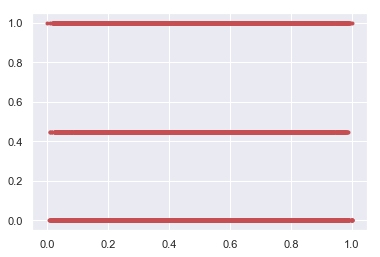

In [22]:
x=features['loc_x']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

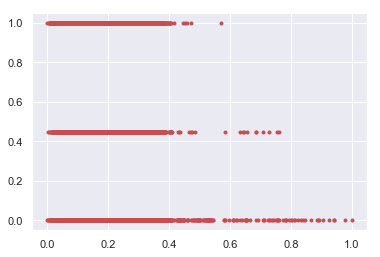

In [23]:
x=features['loc_y']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

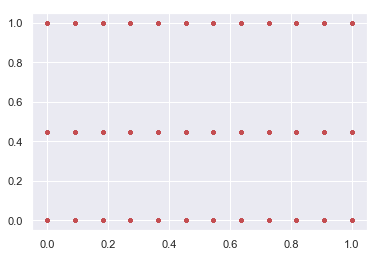

In [24]:
x=features['minutes_remaining']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

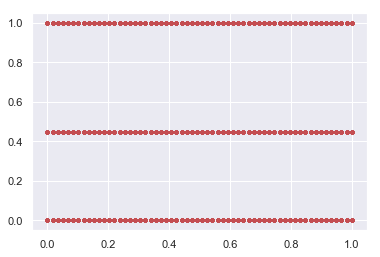

In [25]:
x=features['seconds_remaining']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

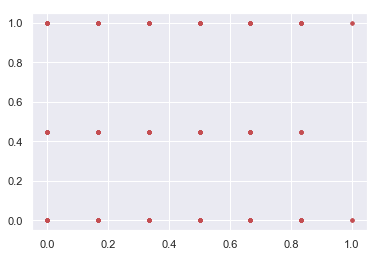

In [26]:
x=features['period']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

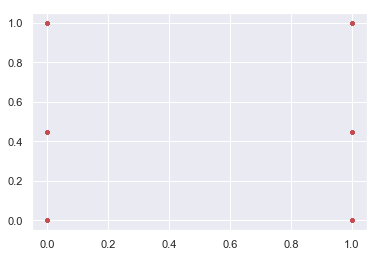

In [27]:
x=features['playoffs']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

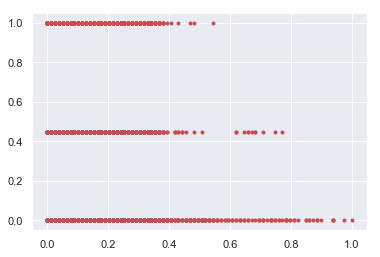

In [28]:
x=features['shot_distance']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

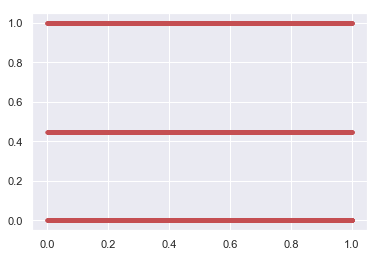

In [29]:
x=features['shot_id']
y=target_new
x=(x-x.min())/(x.max()-x.min())
y=(y-y.min())/(y.max()-y.min())
plt.plot(x,y,'r.')

In [30]:
x=features['shot_distance']
y=target_new
X=np.array(x)
Y=np.array(y)
X=(X-X.min())/(X.max()-X.min())
# Y=(Y-Y.min())/(Y.max()-Y.min())
Y

array([[0.44616103],
       [0.        ],
       [1.        ],
       ...,
       [1.        ],
       [0.        ],
       [0.        ]])

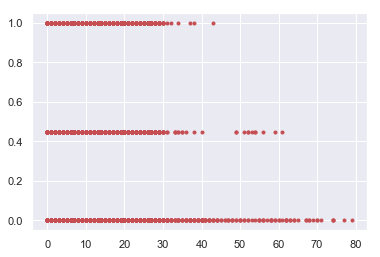

In [31]:
plt.plot(x,y,'r.')